# Activity 3 - Data Analysis
**2020 Data Labs REU**

*Written by Sage Lichtenwalner, Rutgers University, June 12, 2020*

In this notebook we will demonstrate a few data analysis strategies you can use to analyze a timeseries dataset. This is by no means an exhaustive list, but hopefully enough to get you started with some common strategies.

The examples today will continue to use the mooring and shore station timeseries data available from [NDBC](https://www.ndbc.noaa.gov).

In [1]:
# Notebook setup
import xarray as xr
!pip install netcdf4

import matplotlib.pyplot as plt
import numpy as np

# Let's make our plots pretty
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load a NDBC Dataset using Pandas
Following our previous examples, let's load some data from NDBC and convert it to a Pandas Dataframe.

In [0]:
# Open dataset
ds = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')

# Subset the dataset to 1 year
ds = ds.sel(time=slice('2019-01-01','2020-01-01'))

# Convert to Pandas Dataframe
df = ds.to_dataframe().reset_index().set_index('time')

How big is our dataset?

In [3]:
df.shape

(8669, 15)

Once we have data loaded in Pandas, we can use `.head()` `.tail()` and `.sample()` to see what that dataset looks like.  You can pass a number to any of these functions to print out a specific number of rows. 

In [4]:
df.head(3)

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level
time,,,,,,,,,,,,,,,
2019-01-01 00:50:00,40.250999,-73.164001,135.0,11.3,14.1,1.56,00:00:05.559999,00:00:04.710000,153.0,1018.400024,8.1,7.1,NaN,NaN,NaN
2019-01-01 01:50:00,40.250999,-73.164001,127.0,11.2,14.0,1.92,00:00:05.880000,00:00:05.090000,135.0,1016.599976,8.3,7.1,NaN,NaN,NaN
2019-01-01 02:50:00,40.250999,-73.164001,137.0,12.7,15.3,2.23,00:00:06.250000,00:00:05.219999,143.0,1013.599976,8.7,7.2,NaN,NaN,NaN


This also works on specific columns.

In [5]:
# One column
df['air_temperature'].head(3)

time
2019-01-01 00:50:00    8.1
2019-01-01 01:50:00    8.3
2019-01-01 02:50:00    8.7
Name: air_temperature, dtype: float32

In [6]:
# Multiple columns
df[['longitude','latitude']].head(3)

,longitude,latitude
time,,
2019-01-01 00:50:00,-73.164001,40.250999
2019-01-01 01:50:00,-73.164001,40.250999
2019-01-01 02:50:00,-73.164001,40.250999


## Basic Bulk Statistics
Thanks to the magic of pandas, we can quickly calculate a bunch of statistics on our dataset using the `.describe()` function.

In [7]:
df.describe()

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,dominant_wpd,average_wpd,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level
count,8669.000000,8669.000000,8642.000000,8669.000000,8669.000000,8660.000000,8641,8660,8641.000000,8669.000000,8669.000000,8669.000000,0.0,0.0,0.0
mean,40.250999,-73.164001,195.684679,6.693528,8.168374,1.274927,0 days 00:00:07.330060,0 days 00:00:04.976726,162.821548,1016.819458,12.502096,13.550716,NaN,NaN,NaN
std,0.000000,0.000000,100.992567,3.437403,4.219831,0.736393,0 days 00:00:02.633673,0 days 00:00:00.979788,70.678750,8.206482,8.092100,6.862940,NaN,NaN,NaN
min,40.250999,-73.164001,1.000000,0.000000,0.000000,0.220000,0 days 00:00:02.470000,0 days 00:00:02.950000,1.000000,985.599976,-11.700000,3.100000,NaN,NaN,NaN
25%,40.250999,-73.164001,106.250000,4.200000,5.100000,0.760000,0 days 00:00:05.260000,0 days 00:00:04.260000,110.000000,1011.500000,6.100000,6.900000,NaN,NaN,NaN
50%,40.250999,-73.164001,213.000000,6.200000,7.400000,1.080000,0 days 00:00:07.139999,0 days 00:00:04.829999,152.000000,1016.900024,12.000000,13.100000,NaN,NaN,NaN
75%,40.250999,-73.164001,282.000000,8.700000,10.600000,1.570000,0 days 00:00:09.090000,0 days 00:00:05.559999,194.000000,1022.299988,20.100000,20.299999,NaN,NaN,NaN
max,40.250999,-73.164001,360.000000,20.299999,26.900000,4.600000,0 days 00:00:17.389999,0 days 00:00:09.739999,360.000000,1040.599976,27.299999,26.600000,NaN,NaN,NaN


In [8]:
# For specific columns
df[['air_temperature','sea_surface_temperature','wind_spd']].describe()

,air_temperature,sea_surface_temperature,wind_spd
count,8669.000000,8669.000000,8669.000000
mean,12.502096,13.550716,6.693528
std,8.092100,6.862940,3.437403
min,-11.700000,3.100000,0.000000
25%,6.100000,6.900000,4.200000
50%,12.000000,13.100000,6.200000
75%,20.100000,20.299999,8.700000
max,27.299999,26.600000,20.299999


As with a regular Pandas dataframe, these statistics are also a dataframe that can be exported to CSV, in case we want to use it elsewhere.  

*Note, just because it saves a lot of digits, that doesn't mean they're significant!*

In [9]:
# Saving statistics
df[['air_temperature','sea_surface_temperature','wind_spd']].describe().to_csv()

',air_temperature,sea_surface_temperature,wind_spd\ncount,8669.0,8669.0,8669.0\nmean,12.502096176147461,13.550716400146484,6.693528175354004\nstd,8.092100143432617,6.862939834594727,3.4374029636383057\nmin,-11.699999809265137,3.0999999046325684,0.0\n25%,6.099999904632568,6.900000095367432,4.199999809265137\n50%,12.0,13.100000381469727,6.199999809265137\n75%,20.100000381469727,20.299999237060547,8.699999809265137\nmax,27.299999237060547,26.600000381469727,20.299999237060547\n'

### Individual statistics
We can also request these calculations separately. 
* count() - Number of values
* mean()
* std() - Standard Deviation
* min()
* max()
* quantile() - Percentile, defaults to 0.5 = 50%



In [10]:
# Example statistical calc
df.mean()

latitude                                   40.251
longitude                                 -73.164
wind_dir                                  195.685
wind_spd                                  6.69353
gust                                      8.16837
wave_height                               1.27493
dominant_wpd               0 days 00:00:07.330060
average_wpd                0 days 00:00:04.976726
mean_wave_dir                             162.822
air_pressure                              1016.82
air_temperature                           12.5021
sea_surface_temperature                   13.5507
dewpt_temperature                             NaN
visibility                                    NaN
water_level                                   NaN
dtype: object

In [11]:
# Or we could output these individually
print(round(df['wind_spd'].mean(),2))
print(round(df['wind_spd'].std(),2))

6.69
3.44


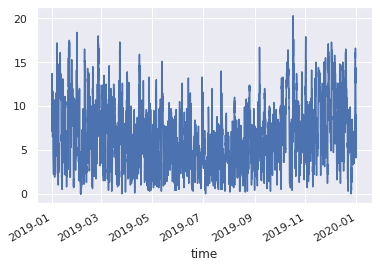

In [12]:
# Quickplot to compare
df.wind_spd.plot();

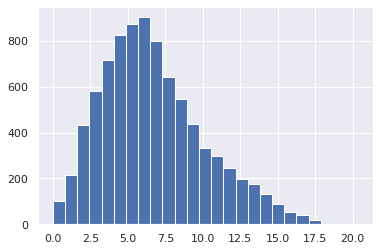

In [13]:
# Quickplot to compare
df.wind_spd.hist(bins=25);

In [0]:
# Your turn - Calculate and compare the mean and std for air & water temps

### Finding Extremes
We can also grab the largest or smallest values in at dataset using `nlargest()` or `nsmallest()`.

In [15]:
df.wind_spd.nlargest()

time
2019-10-17 03:50:00    20.299999
2019-10-17 00:50:00    19.799999
2019-10-17 04:50:00    18.900000
2019-10-17 05:50:00    18.900000
2019-01-31 00:50:00    18.400000
Name: wind_spd, dtype: float32

## Running Averages (resample)

We can also easily calculate hourly, daily and monthly averages using [pandas.resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html).  A number of [offset options](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases) are available for specifying the interval.

Here's a quick example that shows a few different intervals.

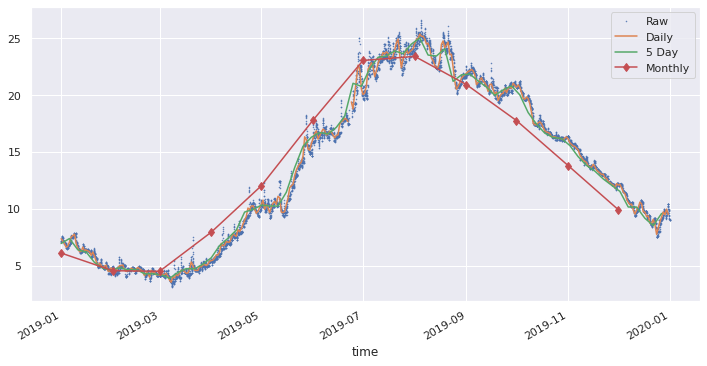

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
df['sea_surface_temperature'].plot(ax=ax,label='Raw', linestyle='None', marker='.', markersize=1)
df['sea_surface_temperature'].resample('D').mean().plot(ax=ax,label='Daily')
df['sea_surface_temperature'].resample('5D').mean().plot(ax=ax,label='5 Day')
df['sea_surface_temperature'].resample('MS').mean().plot(ax=ax,label='Monthly',marker='d') #MS=Month Start
plt.legend();

Note that by default, pandas only provides *Month Start (MS)* or *Month End (M)* periods.  That might be find for business, but in oceanography we want our graphs to have physical meaning.  One option, that gets us a little closer to a *centered average* is to use the loffset parameter. 

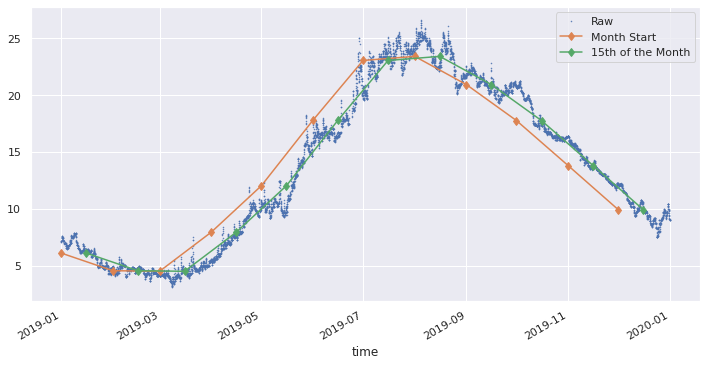

In [17]:
# Let's try this again, but add a 15-day offset to the monthly average 

from datetime import timedelta

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
df['sea_surface_temperature'].plot(ax=ax,label='Raw', linestyle='None', marker='.', markersize=1)
df['sea_surface_temperature'].resample('MS').mean().plot(ax=ax,label='Month Start',marker='d') #MS=Month Start
df['sea_surface_temperature'].resample('MS',loffset=timedelta(days=15)).mean().plot(ax=ax,label='15th of the Month',marker='d')
plt.legend();

In [0]:
# Your Turn - Plot daily or monthly averages (mean) of Air Temp or Wind Speed

In [0]:
# Your Turn - Plot daily or monthly standard deviation (std) for Air Temp or Wind Speed

## Daily & Annual Variation (groupby)

Similarly, we can look at process that vary of the course of a day or a year by averaging all the hours of a day or days of a year together.  (Days of a month probably wouldn't make much sense in oceanography.)  To do this, we can use [pandas.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

The following example was inspired by this [Seasonal Cycle and Anomaly at NDBC 44025](https://datalab.marine.rutgers.edu/2020/03/seasonal-cycle-and-anomaly-at-ndbc-44025/) post. 

To see some other cool examples on how groupby() can be used, check out this [lesson](https://rabernat.github.io/research_computing_2018/pandas-groupby.html) from Ryan Abernathey.

In [0]:
# Load 10 years of data
# Open dataset
ds = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')

# Subset the dataset to 10 years
ds = ds.sel(time=slice('2010-01-01','2020-01-01'))

# Convert to Pandas Dataframe
df = ds.to_dataframe().reset_index().set_index('time')

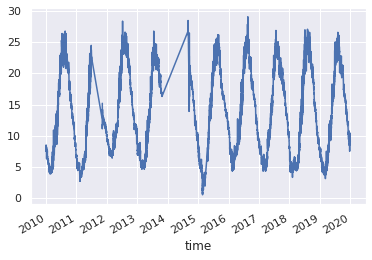

In [21]:
# Quickplot of temperature
df['sea_surface_temperature'].plot();

We can look at this dataset a number of different ways:
* **Hour of the day** - Is there a diurnal cycle?  
  * We could also investigate how this changes seasonally, but we won't get into that here.
* Day of the week - Not really useful here
* Day of the month - Also not useful
* **Month of the year** - Is there an annual pattern?
* **Day of the year** - This is basically a higher resolution view of the monthly averages.

For ease of use, let's add some additional columns to our dataset with the hour, month and yearday.  This isn't strictly needed, we could just use the references directly, e.g. df.index.hour, instead of the simpler df.hour once it's defined. But sometimes it can come in handy.

In [0]:
# Add column for hour of day 
df['hour'] = df.index.hour

# And month
df['month'] = df.index.month

# And day of year
df['yearday'] = df.index.dayofyear

### Daily Cycle

In [0]:
# Calculate the hourly mean
hourly_sst = df.sea_surface_temperature.groupby(df.hour).mean()

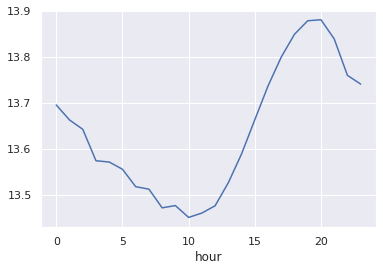

In [24]:
# Quick plot
hourly_sst.plot();

That's a nice looking plot with a noticeable diurnal signal, but it's important to notice how small it is (about a half a degree).  Remember, we're averaging 10-years of data here.  So on average, the hour-by-hour mean is not that far off from the total dataset mean.

We can get a clearer look at this by visualizing the range of the dataset.  Let's calculate the quartiles (25, 50, 75%) to see what they look like.

In [0]:
# Quantile Function Definitions
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.75)

In [0]:
# Calculate the hourly quartiles and mean 
hourly_sst = df.sea_surface_temperature.groupby(df.hour).agg([q1, q2, q3, np.mean])

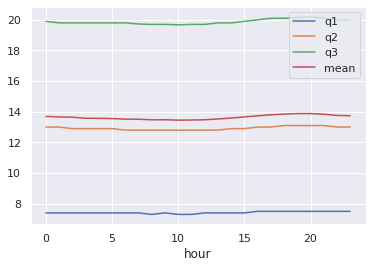

In [27]:
# Quick plot
hourly_sst.plot();

So, yeah, this doesn't tell us much, other than the fact there is a wide spread of the data.

This might be a useful analysis if we were looking at a shorter time period (perhaps a week or a month of data), or if we were looking at this question seasonally (say by looking at just Januaries).

### Annual Cycle by Month

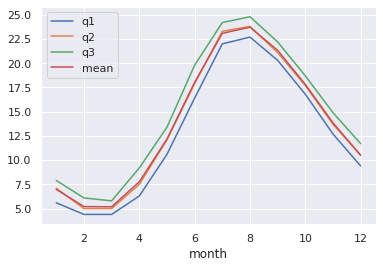

In [28]:
# Calculate the average
monthly_sst = df.sea_surface_temperature.groupby(df.month).agg([q1, q2, q3, np.mean])

# Quick Plot
monthly_sst.plot();

With a long enough dataset, this approach can give us a **Monthly Climatology**.  Here's a quick example which we could also export and save to use elsewhere.

In [29]:
# Monthly climatology
monthly_climatology = df.groupby(df.index.month).mean()
monthly_climatology

,latitude,longitude,wind_dir,wind_spd,gust,wave_height,mean_wave_dir,air_pressure,air_temperature,sea_surface_temperature,dewpt_temperature,visibility,water_level,hour,month,yearday
time,,,,,,,,,,,,,,,,
1,40.250999,-73.164001,227.675220,8.371599,10.385938,1.499277,195.126355,1017.010071,2.899611,6.982348,-2.487602,NaN,NaN,11.490255,1.0,16.035532
2,40.250999,-73.164001,222.490004,8.024861,9.798648,1.473149,183.770847,1016.210510,3.516074,5.211267,-1.869530,NaN,NaN,11.512842,2.0,45.627593
3,40.250999,-73.164001,201.836573,7.574954,9.183776,1.457474,164.837581,1016.639893,4.993104,5.187761,1.684024,NaN,NaN,11.507434,3.0,75.218952
4,40.250999,-73.164001,192.415190,6.253114,7.505553,1.341027,156.084502,1015.159424,8.593872,7.763681,5.472376,NaN,NaN,11.506242,4.0,106.077598
5,40.250999,-73.164001,173.683474,5.379606,6.379094,1.138626,149.810407,1016.031677,13.113023,12.178101,11.714257,NaN,NaN,11.492474,5.0,136.166616
6,40.250999,-73.164001,188.223616,5.222440,6.203795,0.990192,154.321872,1013.318787,18.731003,18.034389,16.534309,NaN,NaN,11.488631,6.0,166.646542
7,40.250999,-73.164001,192.705622,4.964872,5.911243,0.937967,157.869180,1014.778870,23.350443,23.085400,20.713778,NaN,NaN,11.473254,7.0,197.122998
8,40.250999,-73.164001,187.551736,5.224868,6.250377,0.953593,149.328885,1015.773560,23.589617,23.723413,19.803507,NaN,NaN,11.513504,8.0,228.691512
9,40.250999,-73.164001,167.166559,6.106710,7.435549,1.274251,138.031492,1017.589844,20.553637,21.334000,15.588165,NaN,NaN,11.522691,9.0,259.099292


### Annual Cycle by Day
Finally, let's repeat what we did above, but rather than taking the average for each month, we will take the average for each day, which should result in a "higher resolution" visualization.

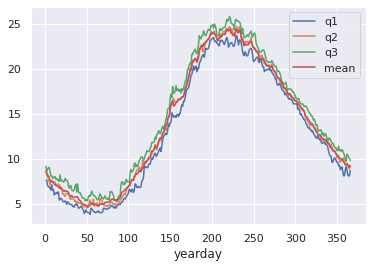

In [30]:
# Calculate the average
daily_sst = df.sea_surface_temperature.groupby(df.yearday).agg([q1, q2, q3, np.mean])

# Quick Plot
daily_sst.plot();

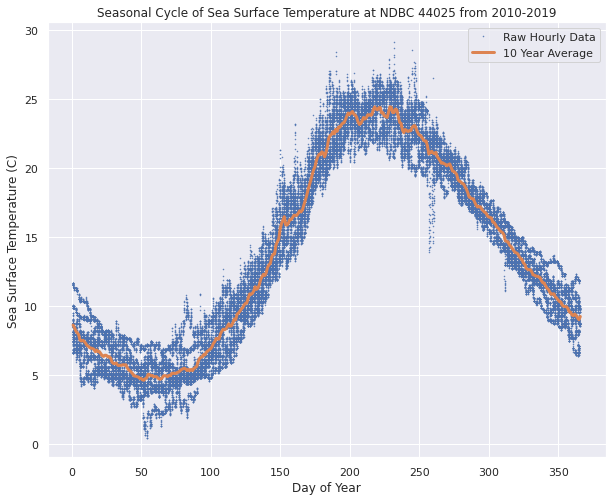

In [31]:
# Pretty plot of data by Yearday
plt.figure(figsize=(10,8))
plt.plot(df.yearday,df.sea_surface_temperature,'.',markersize=1,label='Raw Hourly Data');
plt.plot(daily_sst.index,daily_sst['mean'], linewidth=3,label='10 Year Average')

plt.legend()
plt.xlabel('Day of Year')
plt.ylabel('Sea Surface Temperature (C)')
plt.title('Seasonal Cycle of Sea Surface Temperature at NDBC 44025 from 2010-2019');
plt.savefig('NDBC_44025_Seasonal_SST.png');

## Monthly Averages Plotted by Year
Before we use the resample function to calculate a monthly average.

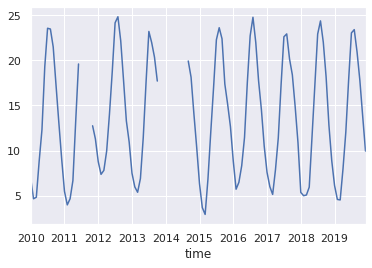

In [32]:
df['sea_surface_temperature'].resample('MS').mean().plot();

But what if we want to plot all the years on top of each other to compare the annual cycles?  For this, we can use a 2-level groupby.

In [33]:
a = df.groupby([df.index.year,df.index.month]).mean()
a

latitude  longitude    wind_dir  ...       hour  month     yearday
time time                                    ...                              
2010 1     40.250999 -73.164001  238.379217  ...  11.461538    1.0   16.048583
     2     40.250999 -73.164001  242.919643  ...  11.500000    2.0   45.500000
     3     40.250999 -73.164001  160.803499  ...  11.512786    3.0   75.002692
     4     40.250999 -73.164001  212.004167  ...  11.500000    4.0  105.500000
     5     40.250999 -73.164001  194.586022  ...  11.500000    5.0  136.000000
...              ...        ...         ...  ...        ...    ...         ...
2019 8     40.250999 -73.164001  177.771930  ...  11.507422    8.0  228.026991
     9     40.250999 -73.164001  166.248611  ...  11.500000    9.0  258.500000
     10    40.250999 -73.164001  158.466307  ...  11.504043   10.0  289.008086
     11    40.250999 -73.164001  240.372222  ...  11.500000   11.0  319.500000
     12    40.250999 -73.164001  210.972028  ...  11.500000   12.0  349.985175

[106 rows x 16 columns]

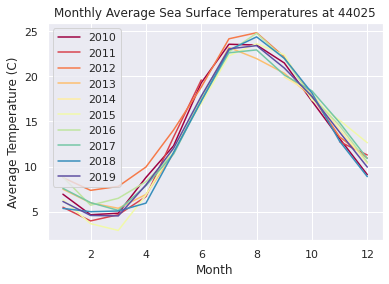

In [34]:
# A crude plot
a.sea_surface_temperature.unstack(0).plot(cmap='Spectral');
plt.xlabel('Month')
plt.ylabel('Average Temperature (C)')
plt.title('Monthly Average Sea Surface Temperatures at 44025')
plt.legend(loc='upper left');

## Climatic Summary Boxplots
We can use the seaborne library to easily create monthly or yearly boxplots of our data.

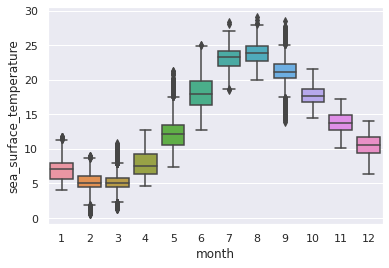

In [35]:
# Monthly
sns.boxplot(data = df, x='month', y='sea_surface_temperature');

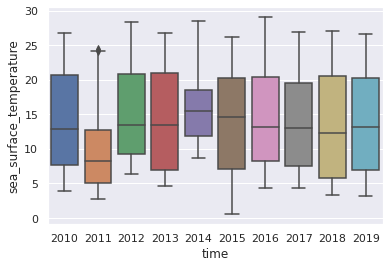

In [36]:
# Yearly
sns.boxplot(data = df, x=df.index.year, y='sea_surface_temperature');

If we wanted to do something fancier, like comparing box plots of Januaries in each year, that would require some additional tricks beyond the scope of this introductory notebook.

## Wind rose
And now for something completely different, let's create a [Wind rose](https://en.wikipedia.org/wiki/Wind_rose) plot, which is a commonly used to show wind or wave speed averages by direction.  It's basically a bar chart that's been wrapped around a compass rose.  

Note, by convention, winds in meteorology are usually defined as the direction the wind is blowing **from**.  

In oceanography, direction is typically defined as the direction a current or wave is moving **towards**.  

It's very confusing, so always check your dataset's documentation.

In [37]:
!pip install windrose
from windrose import WindroseAxes

/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/usr/local/lib/python3.6/dist-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  retu

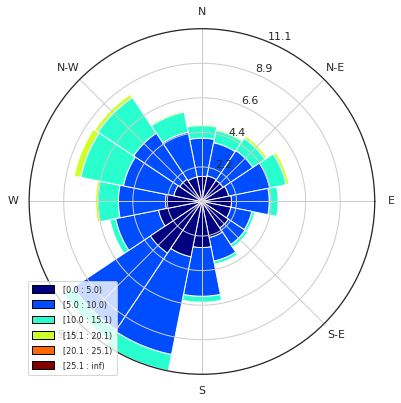

In [38]:
# We need to reset the default plot style for this to work
sns.set_style("white")

fig = plt.figure(figsize=(6,6))

# Plot the windrose
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df.wind_dir, df.wind_spd, normed=True, opening=1, edgecolor='white')
ax.set_legend();

We can also look at just one month to see how it changes over the course of a year.  For example, compare January with July.

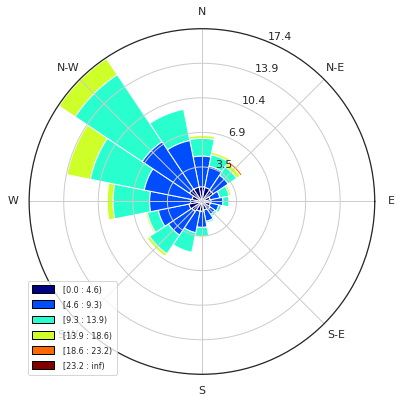

In [39]:
# Define a month to plot
month = 1

fig = plt.figure(figsize=(6,6))

# Plot the windrose
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df.wind_dir[df.index.month==month], df.wind_spd[df.index.month==month], normed=True, opening=1, edgecolor='white')
ax.set_legend();

## Anomaly
Finally, let's show a quick example of an anomaly plot, which depicts the difference in a measured value from a long-term mean.  For this example, we'll load approximately 21 years of data and calculate an average temperature for each yearday over the full record.  Then we will subtract that average from each day's average to plot the anomaly.

Note, in this example, we also demonstrate how to merge two datasets together, including the archive and recent real-time datasets.

In [0]:
# Open datasets
ds1 = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml') #Archive
ds2 = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025h9999.nc') #Realtime

# Subset the dataset
# ds1 = ds1.sel(time=slice('2000-01-01','2020-05-01')) # Set specific date ranges
# ds2 = ds2.sel(time=slice('2020-05-01','2021-01-01'))

ds1 = ds1.where(ds1.time > np.datetime64('2000-01-01'), drop=True) # Grab all data since 1/1/2000
ds2 = ds2.where(ds2.time > ds1.time.max(), drop=True) # Grab all data since the end of the archive

# Convert to Pandas Dataframe
df1 = ds1.to_dataframe().reset_index().set_index('time')
df2 = ds2.to_dataframe().reset_index().set_index('time')

# Merge these datasets
df = df1.combine_first(df2)

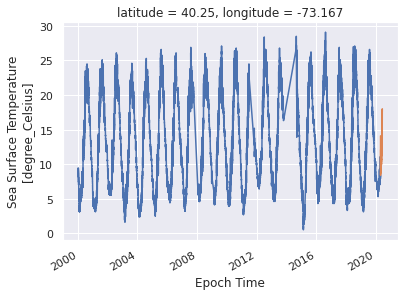

In [41]:
# Change plot style again
sns.set_style("darkgrid")

# Plot all data
ds1.sea_surface_temperature.plot()
ds2.sea_surface_temperature.plot();

In [0]:
# Anomaly claculation
def standardize(x):
    return (x - x.mean())/x.std()

# Calculate a daily average
df_daily = df.resample('1D').mean()

# Calculate the anomaly for each yearday
anomaly = df_daily['sea_surface_temperature'].groupby(df_daily.index.dayofyear).transform(standardize)

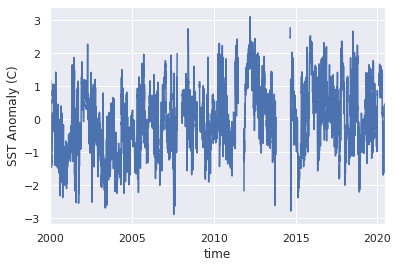

In [43]:
# Plot the full record
anomaly.plot();
plt.ylabel('SST Anomaly (C)');

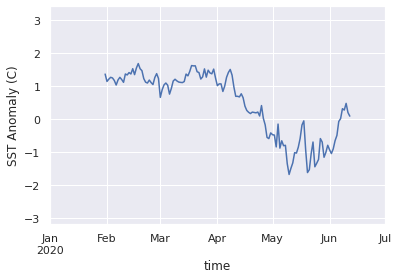

In [44]:
# Plot just this year (so far)
anomaly.plot();

import datetime
plt.xlim(datetime.date(2020,1,1),datetime.date(2020,7,1))
plt.ylabel('SST Anomaly (C)');

Note, the code above was adapted from [this example from Ryan Abernathey](https://rabernat.github.io/research_computing_2018/pandas-groupby.html#Calculating-anomalies), which calculates the anomaly for the full record that you input into the function.  

If you wanted to calculate a climatic average first (say for 1980-2010), and then use that average to calculate an anomaly from a different dataset (say from 2010-2020), you can try the approach used in [this example by Sage](https://datalab.marine.rutgers.edu/2020/03/seasonal-cycle-and-anomaly-at-ndbc-44025/).